In [1]:
import sklearn.linear_model as lm
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('China_Population.csv')

In [3]:
df.head()

,Data Series,Total Population
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000


In [4]:
df.describe()

,Data Series,Total Population
count,61.000000,6.100000e+01
mean,1990.000000,1.094239e+09
std,17.752934,2.355355e+08
min,1960.000000,6.603300e+08
25%,1975.000000,9.163950e+08
50%,1990.000000,1.135185e+09
75%,2005.000000,1.303720e+09
max,2020.000000,1.410929e+09


In [5]:
df.columns=['year','population']

In [6]:
df['population'] = df['population'].astype(float)

### The total population vs year

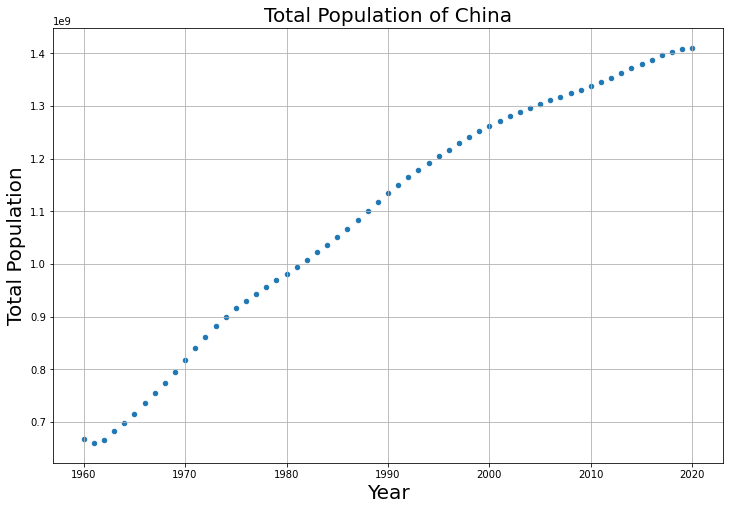

In [7]:
X = df[['year', 'population']].values
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.title("Total Population of China", fontsize=20) 
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Population', fontsize=20)
plt.grid()

### Linear Regression
Use linear regression to build an estimator of the total population of China in the future. Use the data for years 2013 and earlier as training data.

In [8]:
x = df[['year']].values
y = df[['population']].values

x_test = x[-7:]
x_train = x[:54]
y_test = y[-7:]
y_train = y[:54]

In [9]:
lr = linear_model.LinearRegression()
# fit
lr.fit(x_train, y_train)

LinearRegression()

### Parameters

1. The slope and y-intercept of the best fit line and plot the best fit line over the empirical data.

In [10]:
print('Slope:',' '.join(f'{c:.2f}' for c in lr.coef_[0]))
print('Intercept:', f'{lr.intercept_[0]:.2f}')

Slope: 14006789.21
Intercept: -26769089641.76


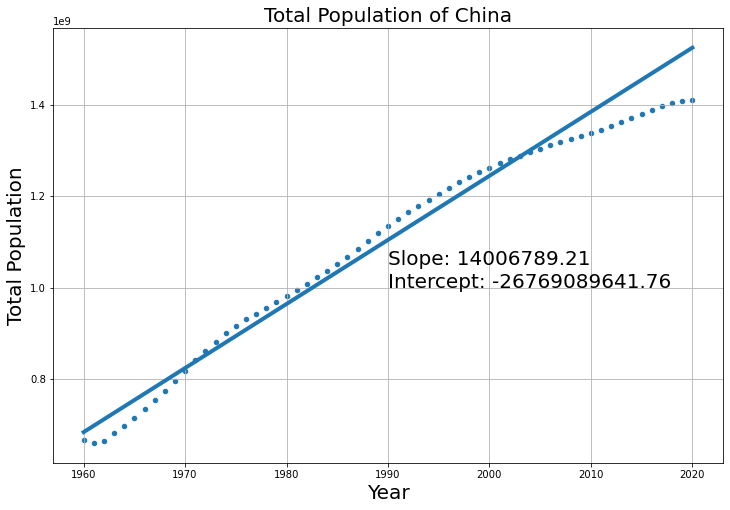

In [11]:
w = lr.coef_
b = lr.intercept_

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

#add points to plot
plt.scatter(x, y, s=20)

#add line of best fit to plot
plt.plot(x, w*x+b, linewidth=4)

ax.text(1990,1e9,"Intercept: "+str(f'{lr.intercept_[0]:.2f}'), fontsize=20)
ax.text(1990,1.05e9,"Slope: "+str(' '.join(f'{c:.2f}' for c in lr.coef_[0])), fontsize=20)
plt.title("Total Population of China", fontsize=20) 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Population', fontsize=20)
plt.grid()

2. Use years greater than 2013 as test data and predict the population for those years.

In [12]:
y_predict=lr.predict(x_test)
for i in range(7):
    print(2014+i,":"," Prediction:",str(' '.join(f'{c:.2f}' for c in y_predict[i]))," True:",str(' '.join(f'{c:.2f}' for c in y_test[i])))

2014 :  Prediction: 1440583832.98  True: 1371860000.00
2015 :  Prediction: 1454590622.20  True: 1379860000.00
2016 :  Prediction: 1468597411.41  True: 1387790000.00
2017 :  Prediction: 1482604200.62  True: 1396215000.00
2018 :  Prediction: 1496610989.84  True: 1402760000.00
2019 :  Prediction: 1510617779.05  True: 1407745000.00
2020 :  Prediction: 1524624568.26  True: 1410929362.00


In [13]:
print("Prediction for 2030 and 2050:")
y_2030 = w*2030+b
y_2050 = w*2050+b
print(2030,":",' '.join(f'{c:.2f}' for c in y_2030[0]))
print(2050,":",' '.join(f'{c:.2f}' for c in y_2050[0]))

Prediction for 2030 and 2050:
2030 : 1664692460.39
2050 : 1944828244.65


3. The mean squared error (MSE) of the estimator on the training data and test data

In [14]:
def calculateMSE(X,Y,m,b): 
    return sum([(y-m*x -b)**2 for x,y in zip(X,Y)])/len(X)

In [15]:
mse_train = calculateMSE(x_train,y_train,w,b)
mse_test = calculateMSE(x_test,y_test,w,b)
print("Mean Squared Error for train data: ",' '.join(f'{c:.2f}' for c in mse_train[0]))
print("Mean Squared Error for test data: ",' '.join(f'{c:.2f}' for c in mse_test[0]))

Mean Squared Error for train data:  811985540736408.50
Mean Squared Error for test data:  8088282817982782.00


In [16]:
y_predict=lr.predict(x)
nmse_train = np.sum((y_train - y_predict[:54])**2) / np.sum((y_train - np.mean(y))**2)
nmse_test = np.sum((y_test - y_predict[-7:])**2) / np.sum((y_test - np.mean(y))**2)
print("Normalized MSE for train data:", nmse_train)
print("Normalized MSE for test data:", nmse_test)

Normalized MSE for train data: 0.01624667590770196
Normalized MSE for test data: 0.08990166993014194


4. The R2 coefficient for the best fit line

In [17]:
from sklearn.metrics import r2_score
y_predict=lr.predict(x)
print("R2: ", r2_score(y, y_predict))

R2:  0.9698177555334624


### A good way to see the change of China population

In [18]:
df = pd.read_csv("China_Population.csv",header=None)

In [19]:
time = df.iloc[1:][0]
years = []
for i in time:
    i = int(i)
    years.append(i)

population = df.iloc[1:][1]
num = []
for i in population:
    i = int(i)
    num.append(i)

In [21]:
from pyecharts.charts import Bar, Timeline
from pyecharts import options as opts
from pyecharts.globals import ThemeType

years = years[::-1]
num = num[::-1]

timeline = Timeline()
timeline.add_schema(is_auto_play=True, play_interval=30,
                    is_loop_play=False)
 
for i in range(len(years)):
    bar = (
            Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC, width="6000px",height='4000px'))
            .add_xaxis(years[:i+1])
            .add_yaxis("", num[:i+1],itemstyle_opts=opts.ItemStyleOpts(color="DarkCyan"),category_gap="46%")
            .extend_axis(
                yaxis=opts.AxisOpts()
            )
            .set_global_opts(title_opts=opts.TitleOpts(title='Total population of China vs year', pos_left="center",subtitle='1950-2020'),
                             yaxis_opts=opts.AxisOpts(min_=600000000, max_=1500000000,name='Total population'))
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        )
    timeline.add(bar, "{}".format(years[i]))  
timeline.render_notebook()